### About

In this notebook, I will simply go over the images, consider possible transformations and make sure I have good understanding of the data.

### Imports

In [10]:
import json
import sys
import os
sys.path.insert(0, "..")

import cv2

import numpy as np
import matplotlib.pyplot as plt

from scripts.utils import get_image_annotations

### Load data

In [3]:
# Load the annotations
with open("../data/annotations/instances_default.json") as f:
    data = json.load(f)

ann = data['annotations']
len(ann)

7686

### Visualize segmentations

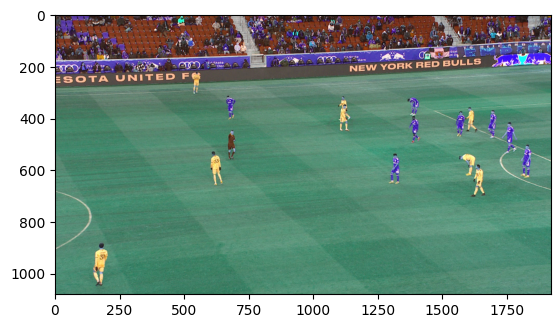

In [4]:
# Select the image id
image_id = 0

# Get the annotations for the given image
selected = get_image_annotations(ann, image_id + 1)

# Load the given image
img = cv2.imread(os.path.join("../data/images", f"{image_id}.jpg"))

plt.imshow(img);

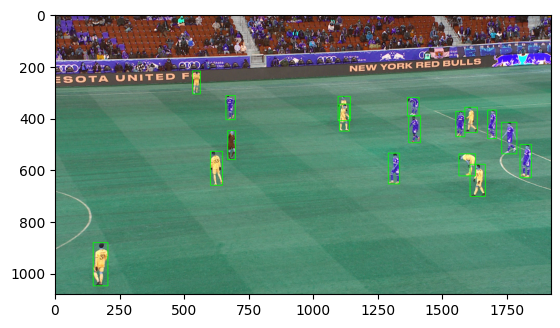

In [5]:
# Draw the annotations
for a in selected:
    bbox = a['bbox']
    x, y, w, h = bbox
    cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)

plt.imshow(img);

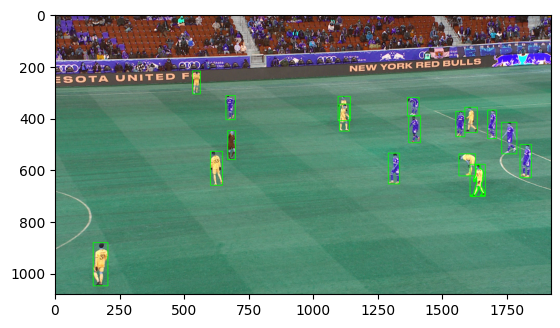

In [6]:
# Get the segmentation points
pts = np.array(selected[0]["segmentation"]).reshape(-1, 1, 2).astype(np.int32)

# Draw the segmentation points
cv2.polylines(img, [pts], isClosed=True, color=(0, 255, 0), thickness=3)

plt.imshow(img);